## Assignment Submission by Nitin Balaji Srinivasan, Cohort 58 - AI and ML

## Melanoma Detection

### Problem Statement & Objective

To build a CNN based model which can accurately detect melanoma.
Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths.
A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce
a lot of manual effort needed in diagnosis.

### Data context

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.


The data set contains the following diseases, which will form classes in the output:

 - Actinic keratosis
 - Basal cell carcinoma
 - Dermatofibroma
 - Melanoma
 - Nevus
 - Pigmented benign keratosis
 - Seborrheic keratosis
 - Squamous cell carcinoma
 - Vascular lesion



### Approach and High Level Steps:

We will learn from the base starter code provided and implement the same for our problem statement.
The model training may take time to train as we will be working with large epochs, therefore we will use GPU runtime

- Data Reading/Data Understanding → Defining the path for train and test images
- Dataset Creation → Create train & validation dataset from the train directory with a batch size of 32. Resize the images to 180*180.
- Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset
- Model Building & training :
    - Create the CNN model to accurately detect 9 classes present in the dataset. Rescale images to normalize pixel values between (0,1).
    - Choose an appropriate optimiser and loss function for model training
    - Train the model for ~20 epochs
    - Write the findings after the model fit. Check if there is any evidence of model overfit or underfit.
- Chose an appropriate data augmentation strategy to resolve underfitting/overfitting
- Model Building & training on the augmented data :
    - Create the CNN model to accurately detect 9 classes present in the dataset. Rescale images to normalize pixel values between (0,1).
    - Choose an appropriate optimiser and loss function for model training
    - Train the model for ~20 epochs
    - Write your findings after the model fit, see if the earlier issue is resolved or not?
- Class distribution: Examine the current class distribution in the training dataset
        - Which class has the least number of samples?
        - Which classes dominate the data in terms of the proportionate number of samples?
- Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
- Model Building & training on the rectified class imbalance data :
    - Create the CNN model to accurately detect 9 classes present in the dataset. Rescale images to normalize pixel values between (0,1).
    - Choose an appropriate optimiser and loss function for model training
    - Train the model for ~30 epochs
    - Write the findings after the model fit, see if the issues are resolved or not?


### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

from tensorflow.keras.preprocessing.image import load_img

In [2]:
# Mounting the google drive:
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


In [3]:
#unzip the dataset
!unzip "/content/gdrive/MyDrive/Colabwork/CNN_MelanomaAssg/CNN_assignment.zip" > /dev/null

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path('/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

In [7]:
# Identify image class names and file paths

#image_dataset_from_directory() will return a tf.data.Dataset based on the batch size specified

image_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,image_size=(180,180),
                                                                    label_mode='categorical',seed=123)

#Identify the class names (from the subdirectory names)
cls = image_dataset.class_names

#Create a file path dictionary
path_dict = {}

for cl in cls:
    path_dict[cl] = list(map(lambda x:str(data_dir_train)+'/'+cl+'/'+x,os.listdir(str(data_dir_train)+'/'+cl)))

Found 2239 files belonging to 9 classes.


In [8]:
#os.listdir(str(data_dir_train)+'/'+cl)
cls
#path_dict

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [9]:
#check the dictionary contains the image file path
path_dict['actinic keratosis'][0:2]

['/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028063.jpg',
 '/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025957.jpg']

### Create a dataset

Define some parameters for the loader:

In [10]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [11]:
# training dataset
## As recommended in the starter notebook, we use seed=123 while creating the dataset using tf.keras.preprocessing.image_dataset_from_directory

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size = batch_size,
                                                               image_size=(img_height,img_width), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [12]:
# validation dataset
## As recommended in the starter notebook, we use seed=123 while creating the dataset using tf.keras.preprocessing.image_dataset_from_directory

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size = batch_size,
                                                               image_size=(img_height,img_width), label_mode='categorical',
                                                               seed=123,subset="validation",
                                                               validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


### Visualize the data

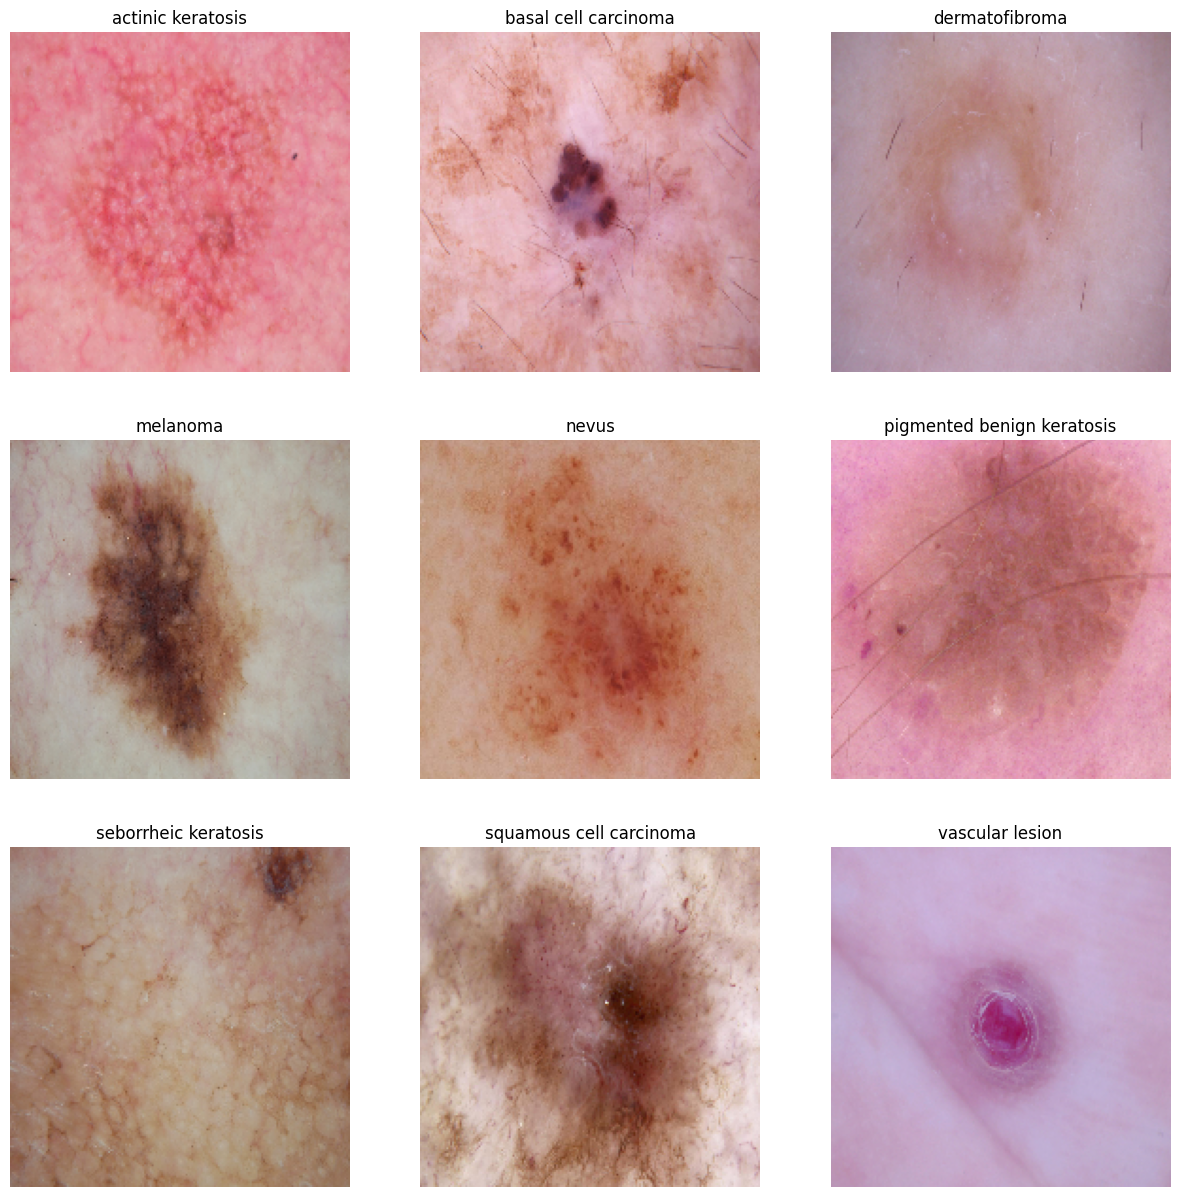

In [13]:
#Visualize the first image of every class
plt.figure(figsize=(15,15))
index = 0
for cl in cls:
    path_list = path_dict[cl][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(path_list[0],target_size=(180,180)))
    plt.title(cl)
    plt.axis("off")
#path_list

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model Creation

### Lets create a CNN model, which can accurately detect 9 classes present in the dataset. We will use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [17]:
#Model creation layer by layer
model = Sequential()

#Rescaling for RGB
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer


In [18]:
#Add convolution layers, dense layers and output layer

#First convolution layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second convolution Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(cls),activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 118336)           

### Compile the model


In [19]:
#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [20]:
#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
chkpt = ModelCheckpoint("model.h5",monitor="accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
elystop = EarlyStopping(monitor="accuracy",patience=5,mode="auto",verbose=1)

In [21]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 118336)           

### Train the model

In [22]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
  ,callbacks=[chkpt,elystop]
)

Epoch 1/20
56/56 [==============================] - ETA: 0s - loss: 2.9020 - accuracy: 0.2221
Epoch 1: accuracy improved from -inf to 0.22210, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 [==============================] - 123s 2s/step - loss: 2.9020 - accuracy: 0.2221 - val_loss: 2.0151 - val_accuracy: 0.2975
Epoch 2/20
56/56 [==============================] - ETA: 0s - loss: 1.9054 - accuracy: 0.2812
Epoch 2: accuracy improved from 0.22210 to 0.28125, saving model to model.h5
56/56 [==============================] - 101s 2s/step - loss: 1.9054 - accuracy: 0.2812 - val_loss: 1.9671 - val_accuracy: 0.3378
Epoch 3/20
56/56 [==============================] - ETA: 0s - loss: 1.7285 - accuracy: 0.3739
Epoch 3: accuracy improved from 0.28125 to 0.37388, saving model to model.h5
56/56 [==============================] - 103s 2s/step - loss: 1.7285 - accuracy: 0.3739 - val_loss: 1.5661 - val_accuracy: 0.4810
Epoch 4/20
56/56 [==============================] - ETA: 0s - loss: 1.5840 - accuracy: 0.4369
Epoch 4: accuracy improved from 0.37388 to 0.43694, saving model to model.h5
56/56 [==============================] - 108s 2s/step - loss: 1.5840 - accuracy: 0.4369 - val_los

### Visualizing training results

In [23]:
if(elystop.stopped_epoch==0):
  epochs_range = range(epochs)
else :
  epochs_range = range(elystop.stopped_epoch+1)

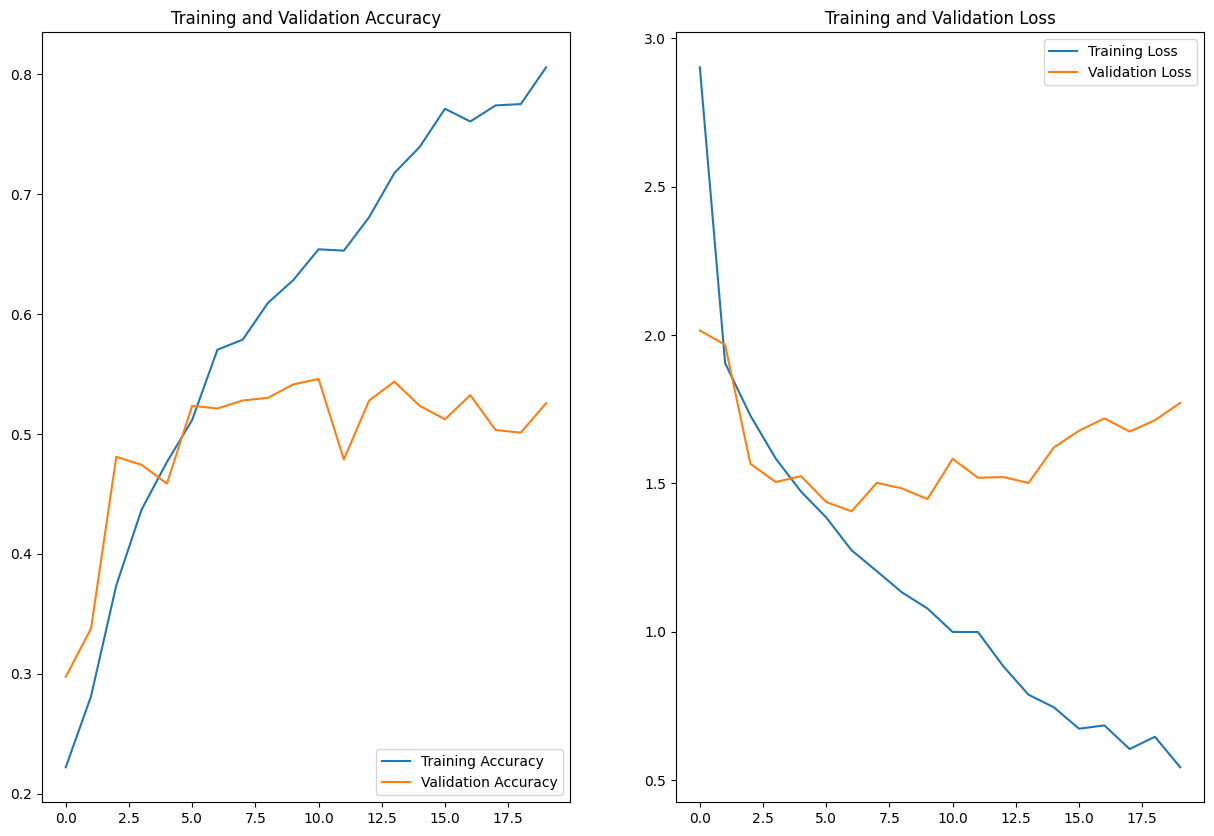

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings from the first training and validation

 -  Epoch 20 indicates the maximum performance of the model at training accuracy of  80.6% and validation accuracy of 52.6%
 - The big difference between training accuracy and validation accuracy indicates overfitting of the model
 - We need to review the distribution of the class images used for training to see if there is a class imbalance that needs to be addressed.
 - We should also include a third convolution layer and additional drop out layer to see if they improve the performance overall
 - Additionally we can monitor validation accuracy as part of checkpoint and early stopping parameters while fitting the model.

### Lets review the distribution of classes in the training dataset

In [26]:
# Distribution of classes

count= []
for pt in pathlib.Path(data_dir_train).iterdir():
  if pt.is_dir():
    count.append(len([name for name in os.listdir(pt) if os.path.isfile(os.path.join(pt, name))]))

#name of the classes
sub_dir = [name for name in os.listdir(data_dir_train) if os.path.isdir(os.path.join(data_dir_train, name))]

class_df = pd.DataFrame(list(zip(sub_dir,count)),columns =['Class', 'Image Count'])

class_df

,Class,Image Count
0,actinic keratosis,114
1,melanoma,438
2,seborrheic keratosis,77
3,basal cell carcinoma,376
4,squamous cell carcinoma,181
5,pigmented benign keratosis,462
6,dermatofibroma,95
7,vascular lesion,139
8,nevus,357


<Axes: xlabel='Image Count', ylabel='Class'>

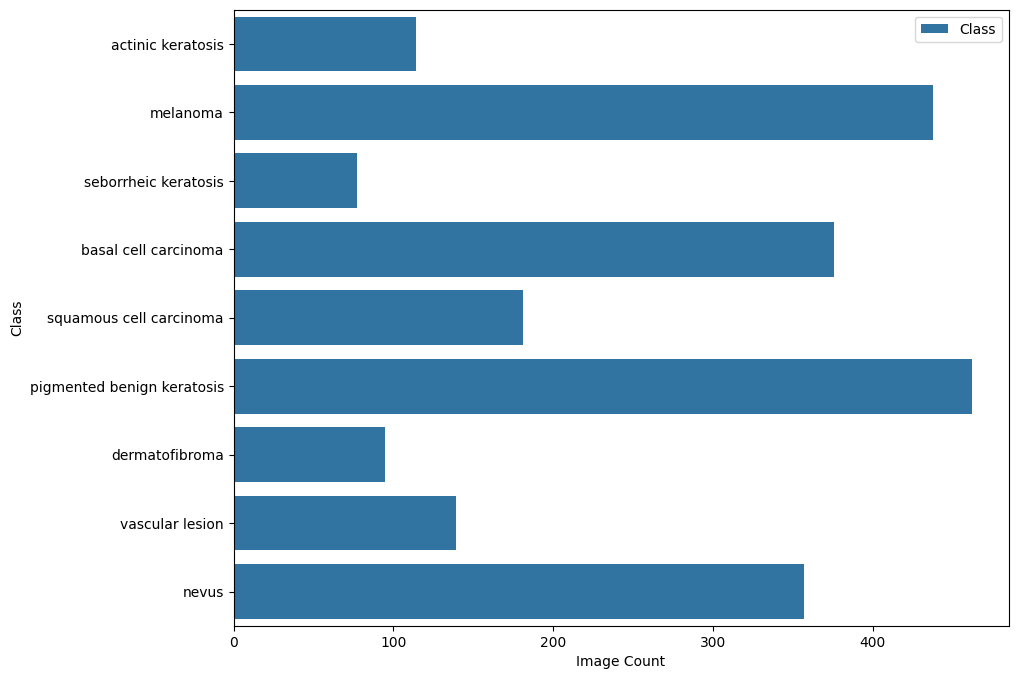

In [27]:

#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="Image Count", y="Class", data=class_df,
            label="Class")

#### There is class imbalance that we need to address
#### - "seborrheic keratosis" has the least number of images
#### - In terms of the training data samples. pigmented benign keratosis and melanoma have the highest proportions.


### We will rectify class imabalance using a python package known as Augmentor (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [28]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [29]:
path_to_training_dataset="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in cls:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C404C383190>: 100%|██████████| 500/500 [00:23<00:00, 21.46 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C404C39FD00>: 100%|██████████| 500/500 [00:24<00:00, 20.15 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C404C35F7C0>: 100%|██████████| 500/500 [00:22<00:00, 21.81 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C404C36A410>: 100%|██████████| 500/500 [02:00<00:00,  4.14 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7C404C42DB10>: 100%|██████████| 500/500 [01:24<00:00,  5.95 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C405286FD00>: 100%|██████████| 500/500 [00:19<00:00, 25.57 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7C404C3803A0>: 100%|██████████| 500/500 [00:44<00:00, 11.32 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C405286FD00>: 100%|██████████| 500/500 [00:18<00:00, 26.83 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C404B24A2F0>: 100%|██████████| 500/500 [00:19<00:00, 25.84 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [30]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [31]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [33]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = df.append(df2)
df2

,Path,Label
0,/content/Skin cancer ISIC The International Sk...,actinic keratosis
1,/content/Skin cancer ISIC The International Sk...,actinic keratosis
2,/content/Skin cancer ISIC The International Sk...,actinic keratosis
3,/content/Skin cancer ISIC The International Sk...,actinic keratosis
4,/content/Skin cancer ISIC The International Sk...,actinic keratosis
...,...,...
4495,/content/Skin cancer ISIC The International Sk...,nevus
4496,/content/Skin cancer ISIC The International Sk...,nevus
4497,/content/Skin cancer ISIC The International Sk...,nevus
4498,/content/Skin cancer ISIC The International Sk...,nevus


In [35]:
df2['Label'].value_counts()

Label
actinic keratosis             500
melanoma                      500
seborrheic keratosis          500
basal cell carcinoma          500
squamous cell carcinoma       500
pigmented benign keratosis    500
dermatofibroma                500
vascular lesion               500
nevus                         500
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Model Building and Training with the following changes
 - Augmented Data
 - Added third convolution layer and other drop out layers
 - Monitor validation accuracy for checkpoint and earlystop parameters


In [36]:
batch_size = 32
img_height = 180
img_width = 180

In [37]:
# training dataset
## As recommended in the starter notebook, we use seed=123 while creating the dataset using tf.keras.preprocessing.image_dataset_from_directory

train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size = batch_size,
                                                               image_size=(img_height,img_width), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [38]:
# validation dataset
## As recommended in the starter notebook, we use seed=123 while creating the dataset using tf.keras.preprocessing.image_dataset_from_directory

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size = batch_size,
                                                               image_size=(img_height,img_width), label_mode='categorical',
                                                               seed=123,subset="validation",
                                                               validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Model creation and rescaling

In [39]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)## your code goes here

In [40]:
#Model creation layer by layer
model = Sequential()

#Rescaling for RGB
model.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer

In [41]:
#Add convolution layers, dense layers and output layer

#First convolution layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Second convolution Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Third convolution Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

#Dropout layer with 50% Fraction of the input units to drop.
model.add(layers.Dropout(0.5))

#Flatten Layer
##Keras.layers.flatten function flattens the multi-dimensional input tensors into a single dimension.
model.add(layers.Flatten())

#Dense Layer
model.add(layers.Dense(128,activation='relu'))

#Dropout layer with 25% Fraction of the input units to drop.
model.add(layers.Dropout(0.25))

#Dense Layer with softmax activation function.
#Softmax is an activation function that scales numbers/logits into probabilities.
model.add(layers.Dense(len(cls),activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)      

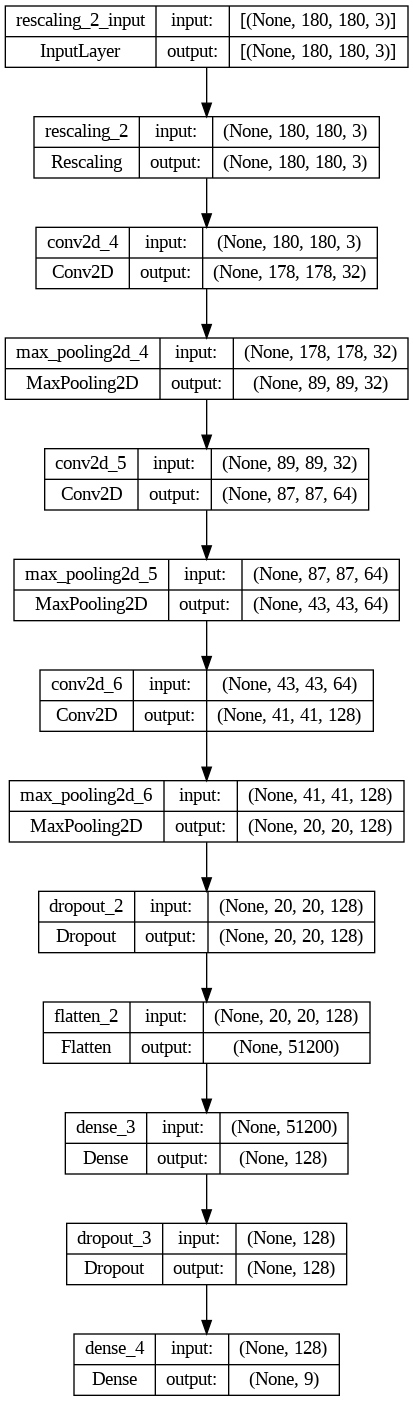

In [42]:
# vizualizing the model
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### Model Compilation (optimiser and loss functions)



In [43]:

#Adam optimization: is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
#categorical_crossentropy: Used as a loss function for multi-class classification model where there are two or more output labels.

model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [44]:
#ModelCheckpoint callback is used in conjunction with training using model.fit() to save a model or weights (in a checkpoint file) at some interval,
#so the model or weights can be loaded later to continue the training from the state saved.
chkpt = ModelCheckpoint("model.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

#Stop training when a monitored metric has stopped improving.
elystop = EarlyStopping(monitor="val_accuracy",patience=5,mode="auto",verbose=1)


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 41, 41, 128)      

#### Model Training (Fitting) with 30 epochs (also including checkpoint and early stop parameters)

In [45]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
  ,callbacks=[chkpt,elystop]
)


Epoch 1/30
169/169 [==============================] - ETA: 0s - loss: 1.7914 - accuracy: 0.3190
Epoch 1: val_accuracy improved from -inf to 0.39718, saving model to model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


169/169 [==============================] - 407s 2s/step - loss: 1.7914 - accuracy: 0.3190 - val_loss: 1.5268 - val_accuracy: 0.3972
Epoch 2/30
169/169 [==============================] - ETA: 0s - loss: 1.4566 - accuracy: 0.4531
Epoch 2: val_accuracy improved from 0.39718 to 0.49369, saving model to model.h5
169/169 [==============================] - 380s 2s/step - loss: 1.4566 - accuracy: 0.4531 - val_loss: 1.3847 - val_accuracy: 0.4937
Epoch 3/30
169/169 [==============================] - ETA: 0s - loss: 1.2874 - accuracy: 0.5195
Epoch 3: val_accuracy improved from 0.49369 to 0.55679, saving model to model.h5
169/169 [==============================] - 375s 2s/step - loss: 1.2874 - accuracy: 0.5195 - val_loss: 1.1793 - val_accuracy: 0.5568
Epoch 4/30
169/169 [==============================] - ETA: 0s - loss: 1.1634 - accuracy: 0.5601
Epoch 4: val_accuracy improved from 0.55679 to 0.56941, saving model to model.h5
169/169 [==============================] - 380s 2s/step - loss: 1.1634 - 

#### Visualise the model results

In [46]:
if(elystop.stopped_epoch==0):
  epochs_range = range(epochs)
else :
  epochs_range = range(elystop.stopped_epoch+1)

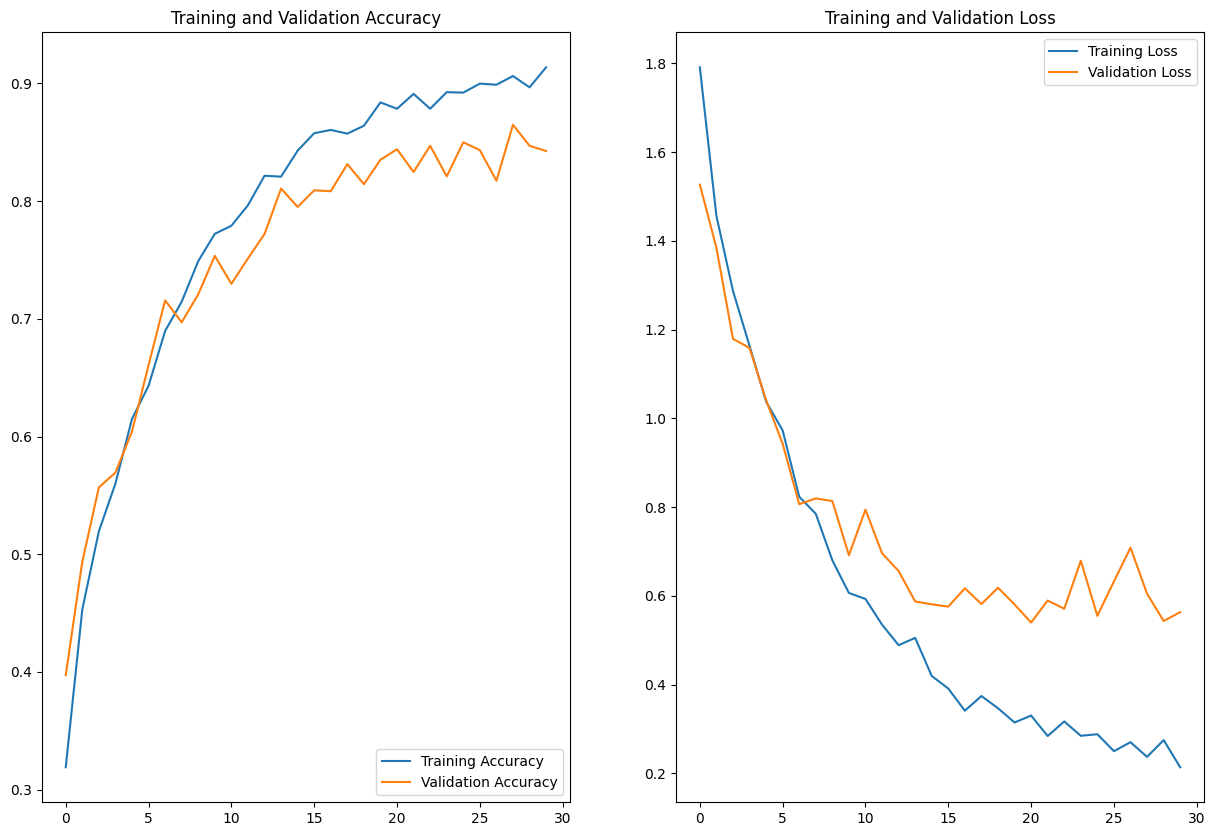

In [47]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations from the improved training and validation

 -  Epoch 28 indicates the maximum performance of the model at training accuracy of  90.6% and validation accuracy of 86.5%
 - The low difference between training accuracy and validation accuracy means that the overfitting found in the previous iteration of the model has been resolved
 - The model training executed until Epoch 30 however the validation accuracy did not improve beyond Epoch 28
 - Addressing class imbalance and adding a third convolution layer have really helped with improving the overall accuracy of the model and avoid overfitting

### Model Prediction

1/1 [==============================] - 0s 397ms/step
Actual Class basal cell carcinoma
Predictive Class basal cell carcinoma


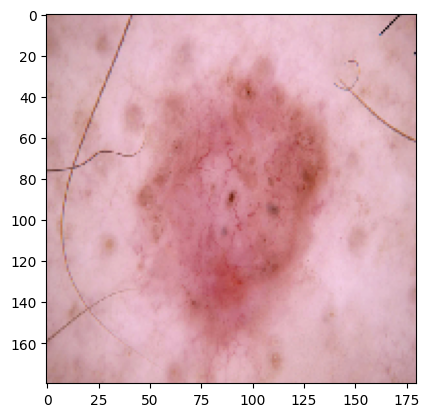

In [49]:
from glob import glob
Test_image_path = os.path.join(data_dir_test, cls[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = cls[pred]
print("Actual Class: "+ cls[1] +'\n'+ "Predictive Class: "+pred_class)

1/1 [==============================] - 0s 62ms/step
Actual Class: nevus
Predictive Class: nevus


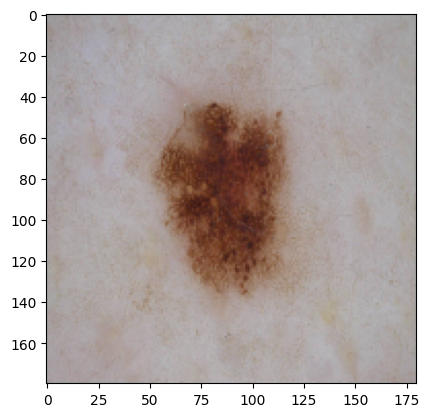

In [55]:
Test_image_path = os.path.join(data_dir_test, cls[4], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = cls[pred]
print("Actual Class: "+ cls[4] +'\n'+ "Predictive Class: "+pred_class)